# *Heart Disease Prediction using ANN + Hyperparameter Tuning*

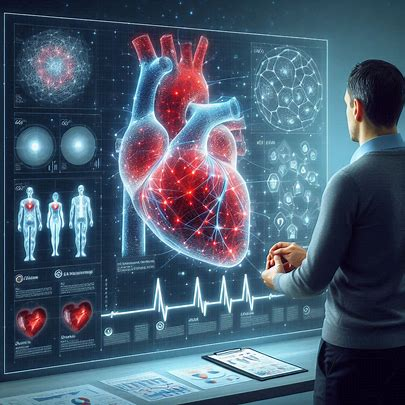

Author: Hamza 

[*Kaggle account*](https://www.kaggle.com/hamza062)


<a id="1"></a> 
# <p style="padding:15px;background-color:#283149;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">1. Import Libraries</p> 

In [ ]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer


# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# machine learning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
#for classification tasks and Regression tasks
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,VotingRegressor, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import pickle

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix,mean_squared_error, classification_report, mean_absolute_error, mean_absolute_percentage_error, f1_score, precision_score, recall_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential


from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

import kerastuner as kt
import tensorflow
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings('ignore')

<a id="1"></a> 

# <p style="padding:15px;background-color:#283149;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">2. Reading and Understanding the Dataset</p> 

<a id="1"></a>  
#### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">2.1. Import Dataset</p>

In [ ]:
# Preview the dataset
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')
df.drop('id', axis=1, inplace=True)
df.head()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">2.2. Discover Data</p>

In [ ]:
df = df.drop(columns=['dataset'])
df.head()

In [ ]:
# View dimensions of dataset   
rows, col = df.shape
print ("Dimensions of dataset: {}" . format (df.shape))
print ('Rows:', rows, '\nColumns:', col)

In [ ]:
# Dtype
print(f'The data type contains:\n object --> {df.dtypes.value_counts()[2]}\n int64 --> {df.dtypes.value_counts()[1]}\n float64 --> {df.dtypes.value_counts()[0]}')

In [ ]:
# Information about the dataframe
df.info()

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">    
    <strong>📝The information of data:</strong> 
    <br>
    
- The **sex**, **dataset**, **cp**, **fbs**, **restecg**, **exang**, **slope** and **thal**  data type is classified as an **object**, while **age** and **num** data types are categorized as **int64**. The remaining data types are represented as **float64**.

In [ ]:
# Statistical details
df.describe()

In [ ]:
#Describe the column with object type
df.select_dtypes(include=['object']).describe().T

In [ ]:
df.sex.value_counts()

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">    
    <strong>📝The table above shows:</strong> 
    <br>
    
-Many features contain **missing values**.

In [ ]:
# Plot the unique value
fig = px.bar(df.nunique(), color=df.nunique(), width=990, height=600, title='Unique Elements in Each Column' , text=df.nunique(), labels={'value':"Count", 'index': ""})   
fig.update(layout_coloraxis_showscale=False)
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=18,  # Set the font size here
    ),
)
fig.show()


<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">

**📝Explenations:**

- 1️⃣ This plot is respresnting the total number of unique values in each column.

<a id="1"></a> 
# <p style="padding:15px;background-color:#283149;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">3. Preprocessing</p> 

<a id="1"></a>  
#### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200"> 3.1. Duplicated Values </p>

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
    
📌**Duplicate data** refers to the presence of identical records in a dataset, which can distort the analysis and lead to incorrect conclusions. Removing duplicates is crucial for accurate analysis and modeling.

In [ ]:
# Duplicated data
df.duplicated().sum()

In [ ]:
df[df.duplicated(keep=False)]

In [ ]:
# Drop duplicated data  
# df.drop_duplicates(inplace=True)    

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">

**📝Explenations:**
    
- 1️⃣ there are two duplicated values, i will remove them imputing after missing values.
    

<a id="1"></a>  
#### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200"> 3.2. Missing Values </p>

In [ ]:
df.chol.value_counts()

In [ ]:
# replace zero values with NaN in cholestrol column
df['chol'] = df['chol'].replace(0, np.nan)

In [ ]:
# Missing values
plt.figure(figsize=(22,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='Blues'  , annot=True,
             fmt='0.0f').set_title('Count missing values', fontsize=18)
plt.show()

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">    
    <strong>📝The table above shows:</strong> 
    <br>

 - 1️⃣ it is not possible for cholesterol levels to be zero so, we will handel all zero values in an effective way.  
-Many features contain **missing values**.

### Let's impute the missing values in thal column by using ML models


In [ ]:
# encode the data using label encoding
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['sex', 'cp', 'thal', 'slope', 'exang', 'restecg', 'fbs']

num_cols = [col for col in df.select_dtypes(exclude='O')]

label_encoders = {}

data = df.copy()

index = {}

for colm in columns_to_encode:
    nan_ixs = np.where(data[colm].isna())[0]
    index[colm] = nan_ixs
    
df.head()

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">    
    <strong>📝The above shows:</strong> 
    <br>
    
-fetch index of **missing values**.

In [ ]:
cols_with_nans = [x for x in df if df[x].isnull().sum() > 0]
num = [col for col in df[cols_with_nans].select_dtypes(exclude='O')]
cat = [col for col in df[cols_with_nans].select_dtypes(include='O')]
num

In [ ]:
df.ca.unique()

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">    
    <strong>📝The above shows:</strong> 
    <br>
    
-separate numeric and categorical **missing value columns**.

In [ ]:
numeri_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']

In [ ]:
for col in columns_to_encode:
    
    le = LabelEncoder()
    
    df[col] = le.fit_transform(df[col])
    
    label_encoders[col] = le
    
    for col, idxs in index.items():
        df.loc[idxs, col] = np.nan
        
df.sample(5)

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">    
    <strong>📝The above shows:</strong> 
    <br>
    
-As we know LabelEncoder also encode **NaN Values**, So, i will use index of NaN to replace them encoded NaN values again to NaN.

In [ ]:
categ_cols = ['fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">    
    <strong>📝:</strong> 
    <br>
    
-num_cols--> **numeric columns with missing values**. <br>
-cat_cols--> **categorical columns with missing values**.

In [ ]:
# from sklearn.preprocessing import QuantileTransformer 
# qt_normal = QuantileTransformer(output_distribution='normal')  
# for c in numeri_cols:
#     df[c] = qt_normal.fit_transform(df[[c]])   
#     sns.histplot(df[c] , kde=True) 
#     df[c].skew()

In [ ]:
# rf_model = LGBMRegressor(
#         objective = "regression",
#         metric = "rmse",
#         n_estimators =  1000,
#         bagging_freq = 1,subsample = 0.413103572972995, 
#                              colsample_bytree = 0.5816717344110182,
#                              min_data_in_leaf = 20,
#                              learning_rate = 0.004730072022055302,
#                              num_leaves = 364, verbose = -1 ,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
for col in numeri_cols:
    
    df_with_missing = df[df[col].isna()]
    # dropna removes all rows with missing values
    df_without_missing = df[df[col].notna()]
    
    # split the data into X and y and we will only take the columns with no missing values
    X = df_without_missing.drop([col], axis=1)
    y = df_without_missing[col]
    
    # split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Random Forest Imputation
    rf_model = LGBMRegressor(
        objective = "regression",
        metric = "rmse",
        n_estimators =  1000,
        bagging_freq = 1,subsample = 0.413103572972995, 
                             colsample_bytree = 0.5816717344110182,
                             min_data_in_leaf = 20,
                             learning_rate = 0.004730072022055302,
                             num_leaves = 364, verbose = -1 ,random_state=42)

    
    rf_model.fit(X_train, y_train)

    # evaluate the model
    y_preds = rf_model.predict(X_test)
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    print("MAE for Random Forest Imputation: ", mean_absolute_error(y_test, y_preds))
    print("RMSE for Random Forest Imputation: ", np.sqrt(mean_squared_error(y_test, y_preds)))
    print("R2 Score for Random Forest Imputation: ", r2_score(y_test, y_preds))
    
    y_pred = np.round(rf_model.predict(df_with_missing.drop([col], axis=1)))
    
    df_with_missing[col] = y_pred
    
    df = pd.concat([df_with_missing, df_without_missing], axis=0)
    

In [ ]:
for col in categ_cols: 
    df_with_missing = df[df[col].isna()]
    # dropna removes all rows with missing values
#     df_without_missing = df.dropna()
    df_without_missing = df[df[col].notna()]
    
    # split the data into X and y and we will only take the columns with no missing values
    X = df_without_missing.drop([col], axis=1)
    y = df_without_missing[col]

    # split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Random Forest Imputation
    rf_model = LGBMClassifier(verbose = -1,learning_rate = 0.023021779601797816, num_leaves = 149, subsample = 0.6929884706542179, colsample_bytree = 0.8635308367372507, min_data_in_leaf = 47, random_state=42)
    rf_model.fit(X_train, y_train)

    # evaluate the model
    y_preds = rf_model.predict(X_test)

    y_pred = rf_model.predict(df_with_missing.drop([col], axis=1))
    
    acc_score = accuracy_score(y_test, y_preds)
    
    print("The feature '"+ col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")
    df_with_missing[col] = y_pred
    
    df = pd.concat([df_with_missing, df_without_missing], axis=0)
    

In [ ]:
df.isnull().sum().sum()

In [ ]:
for i in columns_to_encode:
    df[i] = df[i].astype(int)

In [ ]:
for col in columns_to_encode:
    # Retrieve the corresponding LabelEncoder for the column
    le = label_encoders[col]
    
    # Inverse transform the data
    df[col] = le.inverse_transform(df[col]).astype('O')
    
# check the first 5 rows of the complete dataframe
df.head()

In [ ]:
df.ca.unique()

In [ ]:
df.info()

In [ ]:
df.head(2)

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">

**📝Explenations:**

- 1️⃣ first, i enoded categorical columns to numerical columns using LabelEnocer.  
- 1️⃣ then, i use LGBMClassifier for categorical and LGBMRegressor for numerical column to impute missing values.
- 1️⃣ finally, i reverse encode the dataset.    

<a id="1"></a>  
#### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200"> 3.3. Outliers </p>

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
    
📌Investigating **Outliers** is an essential step in data analysis because they can significantly affect the statistical measures used to describe a dataset. Outliers are observations that differ significantly from other observations in the same dataset and can result from measurement errors, sampling issues, or genuine differences in the population. Identifying and dealing with outliers can help to improve the accuracy and reliability of statistical models and results, leading to more informed decisions and better outcomes. Therefore, outlier investigation is a crucial step in any data analysis process.

In [ ]:
# Separate numerical and categorical features
num_cols = [col for col in df.select_dtypes(exclude='O')]
cat_cols = [col for col in df.select_dtypes(include='O')]
num_cols

In [ ]:
n = df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']]

In [ ]:
# Separate numerical and categorical features
# num_cols = pd.DataFrame (df, columns= num_cols )

num_cols = n
cat_cols = pd.DataFrame (df, columns= cat_cols)

In [ ]:



num_cols.head(1)

In [ ]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(30, 20))
sns.set(font_scale=1.7)
sns.set_style('darkgrid')

outliers_df = pd.DataFrame(columns=['Column', 'Outlier_index', 'Outlier_values'])
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color='#404B69')

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
    outliers_index = df[outliers].index.tolist()
    outliers_values = df[col][outliers].tolist()
    #calculate the percentage of outliers in the dataset
    outliers_percentage = round(len(outliers_values) / df[col].shape[0] * 100, 2)
    print(f"Number of outliers detected in {col}: {outliers_percentage}%")
    outliers_df = pd.concat([outliers_df,pd.DataFrame({'Column': [col], 
                                       'Outlier_index': [outliers_index],
                                       'Outlier_values': [outliers_values]})],
                          ignore_index=True)
    outlier_count = outliers.sum()

    plt.text(0.78, 0.9, "Outliers: "+ str(outlier_count),  transform=plt.gca().transAxes, fontsize=15,)

#x and y for set positons
plt.title("Box Plots of Numeric Columns", fontsize=30, y=3.5, x=1.7)
plt.show()

In [ ]:
outliers_df


<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">    
    <strong>📝 Can Resting blood pressure in mm Hg be 0?:</strong> 
    <br>
    <br>
-No, it is not physiologically possible for resting blood pressure in mm Hg to be zero.

In [ ]:
df[df.trestbps == 0]

In [ ]:
df = df[df['trestbps'] != 0]

In [ ]:
df.duplicated().sum()

In [ ]:
# Drop duplicated data  
df.drop_duplicates(inplace=True)   

In [ ]:
df.shape

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">

**📝Explenations:**

- 1️⃣ The presence of many outliers is also a salient feature of our data. 

In [ ]:
num_cols = df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']]
num_cols.head(2)

In [ ]:
df.ca.value_counts()

In [ ]:
bins=[0,1,2,3,4]
labels=['No-Heart-Disease', 'Mild-Heart-Disease', 'Moderate-Heart-Disease', 'Severe-Heart-Disease']
df['num_bins']=pd.cut(df['num'], bins=bins, labels=labels, include_lowest=True)
df.head()

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">

**📝Explenations:**

- 1️⃣ **Ordinal target variable**: If your target variable represents ordered categories (e.g., rating from 1 to 5), binning can help treat the categories as ordered and potentially improve the model's ability to capture the ordinal nature of the data.
- 1️⃣ **Imbalanced classes**: If your target variable has highly imbalanced classes (e.g., 95% in one class and 5% in another), binning the rare class with other classes can help alleviate the class imbalance issue.
- 1️⃣ **Interpretability**: In some cases, binning the target variable can improve the interpretability of the model's predictions, especially if the original categories are not easily interpretable.
>   
  🎯**Note**  If your target variable is continuous (e.g., a regression problem), binning the target variable is generally not recommended. Continuous target variables should be left as is, and the machine learning model will try to predict the actual numerical value.

In [ ]:
df.isnull().sum()

<a id="1"></a>
# <p style="padding:15px;background-color:#283149;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">4. Exploratory Data Analysis (EDA)</p>

<a id="1"></a>  
#### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200"> 4.1. Univariate Analysis </p>

In [ ]:
# histplot for 
num_variables = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
fig, axs = plt.subplots(4,2, figsize=(20, 26))

for i, col in enumerate(num_variables):
    # Plot histogram with density curve
    sns.histplot(df[col], kde=True, ax=axs[i//2, i%2])
    
     # Add vertical lines for mean, median, Q1 and Q3
    axs[i//2, i%2].axvline(df[col].mean(), color='red',linewidth=2, label='Mean')
    axs[i//2, i%2].axvline(df[col].median(), color='yellow',linewidth=2, label='Median')
    axs[i//2, i%2].axvline(df[col].mode()[0], color='blue', linewidth=2, label='Mode')
    
    
    median = df[col].median()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    # Add text box with important statistics
    axs[i//2, i%2].text(0.95, 0.95,
                        'Mean: {:.2f}\nMedian: {:.2f}\nQ1: {:.2f}\nQ3: {:.2f}\nIQR: {:.2f}\nMin: {:.2f}\nMax: {:.2f}'.format(
                            df[col].mean(), median, q1, q3, iqr, df[col].min(), df[col].max()), 
                        transform=axs[i//2, i%2].transAxes,
                          fontsize=10, va='top', ha='right')
     # Add legend
    axs[i//2, i%2].legend(loc = "upper left", fontsize=13)
    
plt.title("Distribution of Numerical Variables", fontsize=20, y=4.7, x=-0.1)
plt.tight_layout()
plt.show()

In [ ]:
# Check variables skewness
# create a list of features to check
features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

# create an empty DataFrame to store the results
skew_df = pd.DataFrame(columns=['Feature', 'Skewness_type', 'Skewness_value'])

# loop over each feature and calculate its skewness
for feature in features:
    skew = df[feature].skew()

    # determine whether the skewness is positive or negative
    if skew > 0:
        skewness = 'Positively skewed'
    elif skew < 0:
        skewness = 'Negatively skewed'
    else:
        skewness = 'Symmetric'
        
    skew_df = pd.concat([skew_df,pd.DataFrame({'Feature': [feature], 
                                       'Skewness_type': [skewness],
                                       'Skewness_value': [skew]})],
                          ignore_index=True)

In [ ]:
skew_df

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">

**📝Explenations:**

- 1️⃣ If the skewness is between -0.5 to +0.5 then we can say data is fairly symmetrical. If the skewness is between -1 to -0.5 or 0.5 to 1 then data is moderately skewed. And if the skewness is less than -1 and greater than +1 then our data is heavily skewed.**

In [ ]:
from sklearn.preprocessing import QuantileTransformer 
qt_normal = QuantileTransformer(output_distribution='normal')  

<a id="1"></a>  
#### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200"> 4.2. Multivariate Analysis </p>

In [ ]:
# Correlation between the features
fig=plt.gcf()
fig.set_size_inches(12, 7)
plt.title('Correlation Between The Features')
a = sns.heatmap(num_cols.corr(), annot = True, fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">

📌A **correlation coefficient** (r value) that ranges from **0.3 to 0.7** is generally viewed as indicating **moderate correlation**, while a coefficient **greater than 0.7** is indicative of **strong correlation**.    
🔍[Reference](https://www.amazon.com/Engineering-Statistics-Industrial-Bernard-Ostle/dp/0534265383)

In [ ]:
# This function creates a correlation matrix to identify linear correlations between features and their correlation coefficient.
def corr_matrix(data):
    corr_matrix = data.corr()

    for var in corr_matrix.columns:
        # Keep only the correlation values that are greater than 0.7 and less than 1 in absolute value
        corr_matrix[var] = corr_matrix[var].apply(lambda x: x if abs(x) > 0.7 and abs(x) < 1 else '')

    return corr_matrix
corr_matrix(num_cols)

In [ ]:
# Get value count for the target variable
df['num'].value_counts()

In [ ]:
# Plot the class value
fig = px.bar(df['num'].value_counts(), color=df['num'].value_counts(), width=990, height=600, title='Value Count for the Target Variable' , text=df['num'].value_counts(), 
             labels={'x': "Class", 'y': "Count"})   
fig.update(layout_coloraxis_showscale=False)
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=18,  # Set the font size here
    ),
)
fig.show()

<a id="1"></a> 
# <p style="padding:15px;background-color:#283149;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">Deep Learning Model</p> 

<a id="1"></a>  
#### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200"> Classification Task </p>

In [ ]:
 columns_to_encode

In [ ]:
#Encode data
label_encoders ={}
for col in df[['sex', 'cp', 'thal', 'slope', 'exang', 'restecg', 'fbs','num_bins' ]]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df.head()

In [ ]:
from sklearn.preprocessing import QuantileTransformer

columns_to_scale = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
for col in df.drop(['num'],axis=1):
    quantile = QuantileTransformer(output_distribution='normal')

    # Fit and transform the data
    df[col] = quantile.fit_transform(df[[col]])
#     sns.histplot(df[col], kde=True, color='red').set_title(f'Transformed {col}')
#     fig.tight_layout()
#     plt.show()
df.head()

In [ ]:
# histplot for 
num_variables = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
fig, axs = plt.subplots(4,2, figsize=(20, 26))

for i, col in enumerate(num_variables):
    # Plot histogram with density curve
    sns.histplot(df[col], kde=True, ax=axs[i//2, i%2])
    
     # Add vertical lines for mean, median, Q1 and Q3
    axs[i//2, i%2].axvline(df[col].mean(), color='red',linewidth=2, label='Mean')
    axs[i//2, i%2].axvline(df[col].median(), color='yellow',linewidth=2, label='Median')
    axs[i//2, i%2].axvline(df[col].mode()[0], color='blue', linewidth=2, label='Mode')
    
    
    median = df[col].median()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    # Add text box with important statistics
    axs[i//2, i%2].text(0.95, 0.95,
                        'Mean: {:.2f}\nMedian: {:.2f}\nQ1: {:.2f}\nQ3: {:.2f}\nIQR: {:.2f}\nMin: {:.2f}\nMax: {:.2f}'.format(
                            df[col].mean(), median, q1, q3, iqr, df[col].min(), df[col].max()), 
                        transform=axs[i//2, i%2].transAxes,
                          fontsize=10, va='top', ha='right')
     # Add legend
    axs[i//2, i%2].legend(loc = "upper left", fontsize=13)
    
plt.title("Distribution of Numerical Variables", fontsize=20, y=4.7, x=-0.1)
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop(['num'],axis=1)
y = y=df['num']

In [ ]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

In [ ]:
from keras.utils import to_categorical

y_train_oh = to_categorical(y_train, num_classes=None)
y_test_oh = to_categorical(y_test, num_classes=None)

In [ ]:
y_train_oh

<a id="1"></a> 
# <p style="padding:15px;background-color:#283149;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">Keras Tuner</p> 

<a id="1"></a>  
#### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200"> Deep Neural Network </p>

In [ ]:

from keras.layers import ELU
def build_model(hp):
    
    model = Sequential()
    
    counter = 0
    for i in range(hp.Int('num_layers', min_value=1, max_value=20)):
        if counter==0:
            #Input Layer
            model.add(
                Dense(hp.Int('units' + str(i), min_value=8, max_value=128, step=8), 

                            kernel_initializer='he_normal',
                           input_dim=14, #kernel_regularizer  = tensorflow.keras.regularizers.L2(0.001)
                     )
                
            )
            elu_alpha = hp.Float('elu_alpha' + str(i), min_value=0.1, max_value=2.0, step=0.1)
            model.add(ELU(alpha=elu_alpha))
            model.add(BatchNormalization())
            model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
        else:
            #Hidden Layer
            model.add(
                Dense(hp.Int('units' + str(i), min_value=8, max_value=128, step=8), 
                             kernel_initializer='he_normal',
#                              kernel_regularizer  = tensorflow.keras.regularizers.L2(0.001)
                           )
            )
            elu_alpha = hp.Float('elu_alpha' + str(i), min_value=0.1, max_value=2.0, step=0.1)
            model.add(ELU(alpha=elu_alpha))
            model.add(BatchNormalization())
            model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
        counter+=1
    #output layer
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer=hp.Choice('optimizer', values=['rmsprop', 'adam']),
                                      loss='binary_crossentropy',
                                      metrics=['accuracy'])
    return model

In [ ]:
tuner = kt.RandomSearch(build_model,
                       objective='val_accuracy',
                       max_trials = 5)

In [ ]:
tuner.search(X_train, y_train_oh, batch_size = 32, epochs=5, validation_data=(X_test,y_test_oh))

In [ ]:
tuner.get_best_hyperparameters()[0].values

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# callback = EarlyStopping(
#     monitor="val_loss",
#     min_delta=0.00001,
#     patience=20,
#     verbose=1,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=False
# )

In [ ]:
model.fit(X_train, y_train_oh,epochs=200,initial_epoch=6 ,validation_data=(X_test,y_test_oh))

<a id="1"></a> 
# <p style="padding:15px;background-color:#283149;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">Model Evaluation</p> 

In [ ]:
#evaluate the model
_, train_mse = model.evaluate(X_train, y_train_oh, verbose=0)
_, test_mse = model.evaluate(X_test, y_test_oh, verbose=0)
print(f"Training MSE: {train_mse:.4f}, Testing MSE: {test_mse:.4f}")

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">    
    <strong>📝Explanations::</strong> 
    <br>
   
    
The training-set accuracy score is **0.92** while the test-set accuracy to be **0.84**. These two values are quite comparable. So, there is no question of overfitting.